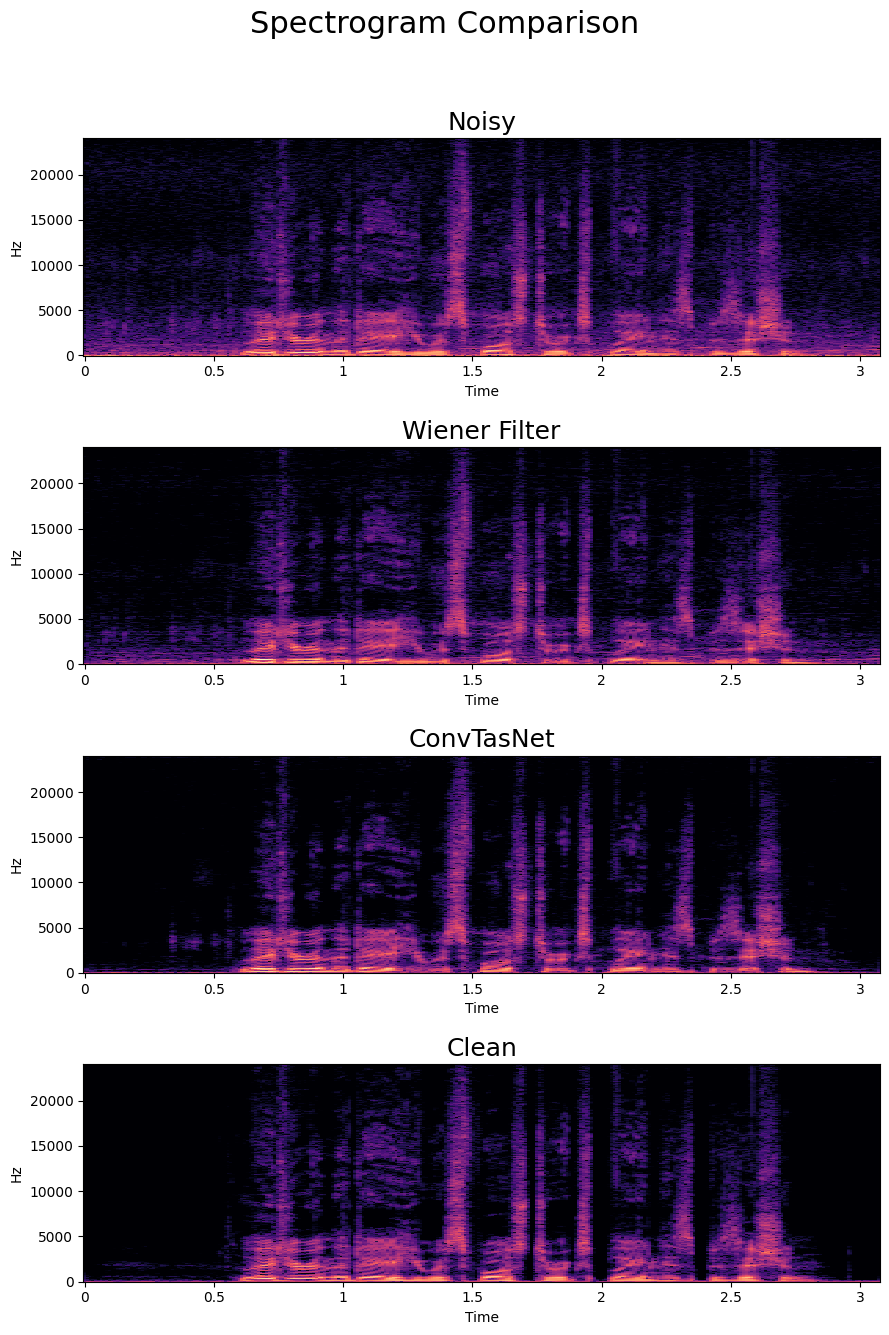

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# File paths
base_path = "/opt/users/gpel0001/nnc-fyp/.Project/Output/wav"
files = {
    "Noisy": "noisy_p232_334.wav",
    "Wiener Filter": "wiener_p232_334.wav",
    "ConvTasNet": "ConvTasNet_p232_334.wav",
    "Clean": "clean_p232_334.wav"
}

# Transparent background
fig, axes = plt.subplots(4, 1, figsize=(9, 14), facecolor='none')
fig.suptitle("Spectrogram Comparison", fontsize=22)

for idx, (label, filename) in enumerate(files.items()):
    file_path = os.path.join(base_path, filename)
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.stft(y)
    S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

    ax = axes[idx]
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='hz', ax=ax, cmap='magma')
    ax.set_title(label, fontsize=18)
    ax.set_facecolor('none')  # Transparent background

# Minimal whitespace
plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=1.5)

# Save as high-quality poster assets
plt.savefig("spectrogram_vertical_clean.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
